In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 가져오기

In [5]:
old_people_population = pd.read_csv('data\\고령화.txt',sep ='\t', encoding='utf-8')
silver_zone = pd.read_csv('data\\전국노인장애인보호구역표준데이터.csv',encoding = 'cp949')
young_zone = pd.read_csv('data\\전국어린이보호구역표준데이터.csv', encoding = 'cp949')
old_welfare = pd.read_csv('data\\노인여가복지시설.txt',sep ='\t', encoding='utf-8')
old_nursing = pd.read_csv('data\\서울특별시 노인요양시설 정보_20180821 (1).csv', encoding='cp949')
young_nursery = pd.read_csv('data\\어린이보육시설.txt',sep = '\t', encoding='utf-8')

OSError: Initializing from file failed

## 노인 인구 데이터 전처리

In [ ]:
#데이터 확인
# old_people_population.head(5)
# 데이터 정리 - 전체인구+65세이상인구 칼럼만 사용
old_people_population = old_people_population.drop([0,1,2]).reset_index()
old_people_population = old_people_population[old_people_population['동'] == '소계']
old_people_population = old_people_population[['자치구','전체인구','65세이상 인구']]

In [ ]:
#str데이터 int로 바꿔주기
old_people_population['전체인구'] = old_people_population['전체인구'].str.replace(',','')
old_people_population['65세이상 인구'] = old_people_population['65세이상 인구'].str.replace(',','')
old_people_population = old_people_population.astype({'전체인구':int,'65세이상 인구':int})

In [ ]:
old_people_population.dtypes

In [ ]:
# 노인인구 비율 칼럼 추가
old_people_population['노인비율'] = old_people_population['65세이상 인구']/old_people_population['전체인구']

### 전체인구 vs 노인인구

In [ ]:
# 2019년 전체 인구
total_population_2019 = old_people_population.groupby('자치구').sum()[['전체인구','65세이상 인구']].sum()
total_population_2019

In [ ]:
# 2019년 서울시 노인인구 vs 전체인구
old_people_population = old_people_population.set_index('자치구')
old_people_population

In [ ]:
old_people_population.sort_values(by=['노인비율'],axis=0,ascending = False)

In [ ]:
district_old = old_people_population['65세이상 인구']
district_old.sort_values(ascending=False)

## 노인보호구역, 어린이구역 데이터 전처리

In [ ]:
silver_zone.head()

In [ ]:
# 필요한 데이터만 가져오기 - 서울특별시
silver_zone['시도명'].unique()
silver_zone_seoul = silver_zone[silver_zone['시도명']=='서울특별시']
silver_zone_seoul.head(5)

In [ ]:
#잘못된 데이터 수정 + 칼럼 이름 수정
silver_zone_seoul['시군구명'].unique()
silver_zone_seoul['시군구명'] = silver_zone_seoul['시군구명'].str.replace('서울특별시 노원구','노원구')
silver_zone_seoul = silver_zone_seoul.rename({'시군구명':'자치구'},axis='columns')

In [ ]:
silver_zone_seoul['자치구'].unique()

In [ ]:
young_zone.head(5)

In [ ]:
#서울시 데이터만 가져오기
young_zone_seoul = young_zone.loc[young_zone['소재지도로명주소'].str.contains('서울특별시',na=False)]
young_zone_seoul

In [ ]:
#자치구 칼럼 생성
young_zone_seoul['자치구'] = young_zone_seoul['소재지도로명주소'].str.split(" ").str[1]


In [ ]:
# 잘못된 데이터 수정
young_zone_seoul['자치구'] = young_zone_seoul['자치구'].str.replace('덕릉로62길','도봉구')

In [ ]:
young_zone_seoul[young_zone_seoul['자치구']=='마포구']

In [ ]:
silver_seoul_dist= silver_zone_seoul.groupby('자치구').size()
young_seoul_dist= young_zone_seoul.groupby('자치구').size()

In [ ]:
seoul_zone_dist = pd.concat([silver_seoul_dist,young_seoul_dist], axis=1, keys = ['노인','어린이'])

In [ ]:
# NaN갑 처리
seoul_zone_dist = seoul_zone_dist.fillna(0)

In [ ]:
# 자치구별 노인보호구역 vs 어린이 보호구역
seoul_zone_dist = seoul_zone_dist.astype({'노인':int,'어린이':int})

In [ ]:
#마포구 추가
seoul_zone_dist.loc['마포구'] = [0,0]

### 노인 vs 어린이

In [ ]:
seoul_zone_dist

## 노인인구비율 vs 노인보호구역

In [ ]:
populationVszone = pd.concat([old_people_population['노인비율'], seoul_zone_dist['노인']],axis=1).fillna(0)

In [ ]:
populationVszone = populationVszone.astype({'노인':int})

In [ ]:
populationVszone

## 노인요양시설/여가시설 데이터 전처리


In [ ]:
# 여가시설
old_welfare.head()

In [ ]:
old_welfare = old_welfare.drop([0,1])
old_welfare_seoul = old_welfare[['자치구','시설합계']]

In [ ]:
old_welfare_seoul= old_welfare_seoul.set_index('자치구')
old_welfare_seoul = old_welfare_seoul.rename({'시설합계':'복지시설'},axis='columns')
old_welfare_seoul.head()

In [ ]:
old_welfare_seoul.shape

In [ ]:
# 요양시설
old_nursing.head()

In [ ]:
# 자치구 칼럼 생성하기
old_nursing['자치구'] = old_nursing['소재지전체주소'].str.split(" ").str[1]

In [ ]:
# 데이터 확인
old_nursing['자치구'].unique()

In [ ]:
old_nursing_seoul = old_nursing[old_nursing['자치구'].str.contains('구')]

In [ ]:
old_nursing_seoul['자치구'].unique()

In [ ]:
nursing = old_nursing_seoul.groupby('자치구').size().sort_values(ascending = False)

In [ ]:
old_people_population['노인비율'].sort_values(ascending = False)

In [ ]:
old_welfare_seoul = old_welfare_seoul.astype({'복지시설':int})

In [ ]:
old_welfare_seoul = old_welfare_seoul['복지시설']

In [ ]:
old_welfare_seoul.sort_values(ascending = False)

In [ ]:
import pandas as pd

## 아이는 줄고, 노인은 늘고

In [11]:
population = pd.read_csv('data\\인구.txt',sep='\t', engine= 'python',encoding='utf-8')
population

,기간,행정구역별,성별,계,0세,1세,2세,3세,4세,5세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,2015,합계,계,"10,022,181","77,668","78,187","76,152","83,046","78,850","78,745",...,"5,107","5,055","3,825","2,812","2,154","1,540","1,090",950,773,"5,037"
1,2015,합계,남자,"4,930,943","39,785","40,119","39,031","42,625","40,400","40,483",...,"1,357","1,405",972,717,601,440,274,239,188,"1,293"
2,2015,합계,여자,"5,091,238","37,883","38,068","37,121","40,421","38,450","38,262",...,"3,750","3,650","2,853","2,095","1,553","1,100",816,711,585,"3,744"
3,2015,종로구,계,"154,986",817,860,815,980,881,964,...,124,117,115,85,75,47,40,33,28,209
4,2015,종로구,남자,"76,548",409,436,417,526,440,497,...,37,38,45,32,29,19,15,9,8,71
5,2015,종로구,여자,"78,438",408,424,398,454,441,467,...,87,79,70,53,46,28,25,24,20,138
6,2015,중구,계,"125,733",842,861,830,906,856,838,...,108,103,74,50,47,32,31,26,26,137
7,2015,중구,남자,"62,687",425,433,438,462,439,426,...,37,30,19,18,17,11,14,8,12,40
8,2015,중구,여자,"63,046",417,428,392,444,417,412,...,71,73,55,32,30,21,17,18,14,97
9,2015,용산구,계,"233,342","1,744","1,701","1,751","1,840","1,760","1,637",...,188,176,140,94,72,61,47,34,33,289


In [12]:
population = population [population['성별'] == '계']

In [13]:
population_year = population[population['행정구역별'] == '합계']

In [14]:
population_year.drop(['행정구역별', '성별'], axis='columns', inplace=True)

C:\Users\Hwang\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
population_year = population_year.set_index('기간').fillna(0)

In [16]:
below13 = population_year.loc[:,'0세':'13세']
over65 = population_year.loc[:,'65세':'100세 이상']
over65 = over65.astype({'99세': str})
over65.dtypes

65세        object
66세        object
67세        object
68세        object
69세        object
70세        object
71세        object
72세        object
73세        object
74세        object
75세        object
76세        object
77세        object
78세        object
79세        object
80세        object
81세        object
82세        object
83세        object
84세        object
85세        object
86세        object
87세        object
88세        object
89세        object
90세        object
91세        object
92세        object
93세        object
94세        object
95세        object
96세        object
97세        object
98세        object
99세        object
100세 이상    object
dtype: object

In [17]:
for i in below13.columns:
    below13[i] = below13[i].str.replace(',','')

In [18]:
for p in over65.columns:
    over65[p] = over65[p].str.replace(',','')

In [19]:
 for i in over65.columns:
    over65 = over65.astype({i: int})
 for p in below13.columns:
    below13 = below13.astype({p: int})

In [20]:
young13 = below13.sum(axis = 1)

In [21]:
old65 = over65.sum(axis = 1)

In [22]:
young_old = pd.concat([young13,old65],keys=['어린이','노인'],axis=1)

In [23]:
young_old

,어린이,노인
기간,,
2015,1106803,1262436
2016,1073171,1295899
2017,1036185,1359901
2018,991053,1410297
2019,961668,1478664


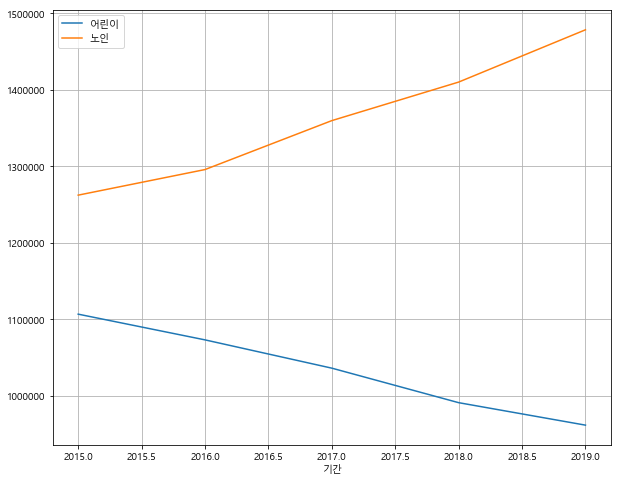

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

young_old.plot(figsize=(10,8),grid = True)
plt.savefig('img\\child_old.png')

## 시설 1개당 대응 노인 수


In [ ]:
nursing # 자치구별 요영사설 수
old_people_population # 구별 인구

In [ ]:
data = pd.concat([nursing,old_people_population], axis = 1)
data

In [ ]:
data['요양시설 대응 노인수'] = data['65세이상 인구']/data[0]
data

In [ ]:
data1 = pd.concat([old_welfare_seoul,old_people_population], axis = 1)
data1

In [ ]:
data1['복지시설 대응 노인수'] = data1['65세이상 인구']/data1['복지시설']
data1

### 구별 시설들이 대응해야할 노인 수

In [ ]:
data2 = pd.concat([data1['복지시설 대응 노인수'],data['요양시설 대응 노인수'],data['65세이상 인구']], axis = 1)


In [ ]:
data2

In [ ]:
data2['복지'] = data2['복지시설 대응 노인수']/data2['65세이상 인구']
data2['요양'] = data2['요양시설 대응 노인수']/data2['65세이상 인구']

In [ ]:
data2

In [ ]:
data3 = data2[['복지','요양']]

In [ ]:
data3['복지'] = data3['복지']*100
data3['요양'] = data3['요양']*100

In [ ]:
data2 = data2.astype({'복지시설 대응 노인수':int, '요양시설 대응 노인수':int})

In [ ]:
onenursing = data2['요양시설 대응 노인수'].sort_values(ascending=False)

In [ ]:
onewelfare = data2['복지시설 대응 노인수'].sort_values(ascending=False)

In [ ]:
onenursing.plot(kind='barh')

In [ ]:
onewelfare.plot(kind='barh')

In [ ]:
top5_nursing = onenursing.head(5)
top5_welfare = onewelfare.head(5)
low3_nursing = onenursing.tail(3)
low3_welfare = onewelfare.tail(3)

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
top5_nursing.plot(kind='barh')
plt.subplot(1,2,2)
low3_nursing.plot(kind='barh',color='r')

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
top5_welfare.plot(kind='barh')
plt.subplot(1,2,2)
low3_welfare.plot(kind='barh',color='r')

## 서울시 5년(2015~2019) 노인복지

In [ ]:
nursing_origin = pd.read_csv('의료복지2015~2019.txt',sep='\t')

In [ ]:
nursing_origin

In [ ]:
nursing_2016_2019 = nursing_origin[['기간','자치구','합계']]

In [ ]:
nursing_2016_2019.set_index('기간')